# <span style='background:black'><span style='color:Cyan'> <span style='font-family:"Times New Roman"'> Objective: 
### <span style='font-family:"Times New Roman"'>This code constructs the Magnitude Spectra for an image and shows Importance of Phase Angle.

# <span style='font-family:"Times New Roman"'>Loading Required Libraries 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import math

# <span style='font-family:"Times New Roman"'>Loading Image

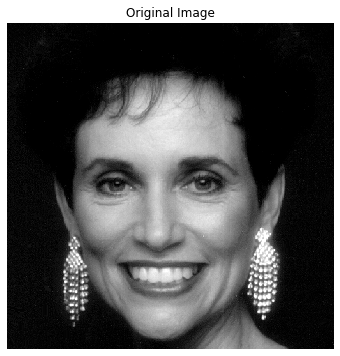

In [2]:
fig = plt.figure(figsize=(18, 6))
woman = mpimg.imread('woman.tif')
imgplot = plt.imshow(woman, cmap = 'gray')
plt.title('Original Image')
plt.axis('off')
plt.show()

In [3]:
Freqwoman = np.fft.fft2(woman)
magnitude_spectrum = np.log(np.abs(Freqwoman))

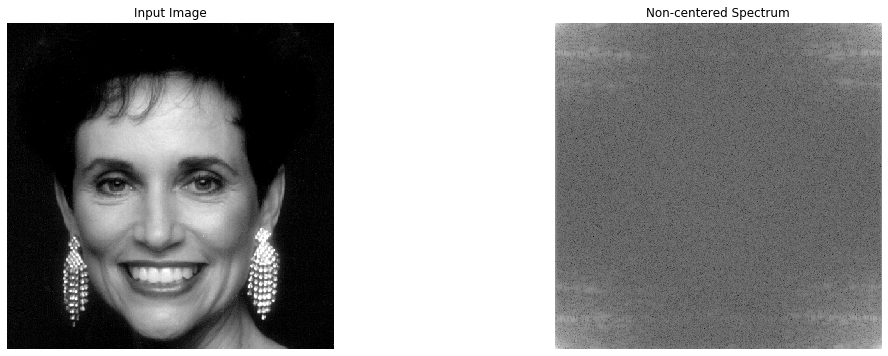

In [4]:
fig = plt.figure(figsize=(18, 6))
plt.subplot(121)
plt.imshow(woman, cmap = 'gray')
plt.title('Input Image')
plt.axis('off')
plt.subplot(122)
plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Non-centered Spectrum')
plt.axis('off')
plt.show()

In [5]:
CS = np.fft.fftshift(Freqwoman)
magnitude_spectrum_NC = np.log(np.abs(CS))

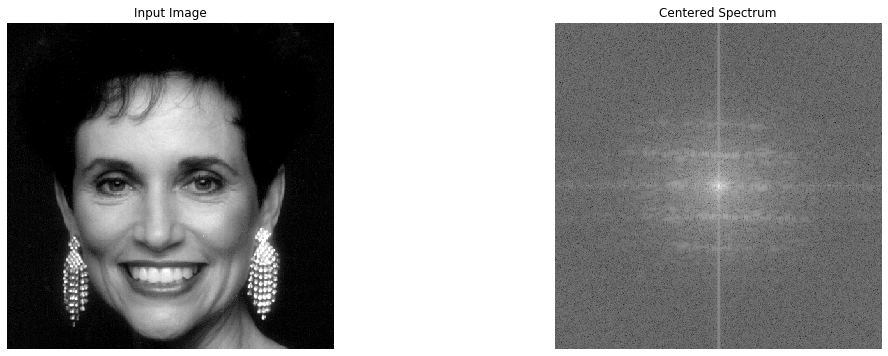

In [6]:
fig = plt.figure(figsize=(18, 6))
plt.subplot(121)
plt.imshow(woman, cmap = 'gray')
plt.title('Input Image')
plt.axis('off')
plt.subplot(122)
plt.imshow(magnitude_spectrum_NC, cmap = 'gray')
plt.title('Centered Spectrum')
plt.axis('off')
plt.show()

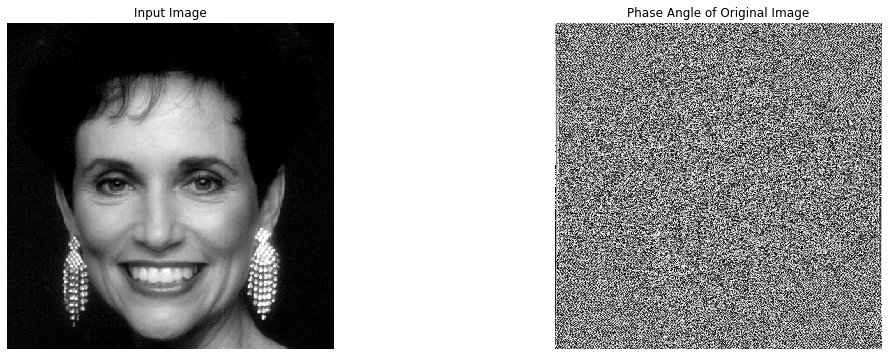

In [7]:
fig = plt.figure(figsize=(18, 6))
plt.subplot(121)
plt.imshow(woman, cmap = 'gray')
plt.title('Input Image')
plt.axis('off')
plt.subplot(122)
plt.imshow(np.angle(Freqwoman), "gray")
plt.title("Phase Angle of Original Image")
plt.axis('off')
plt.show()

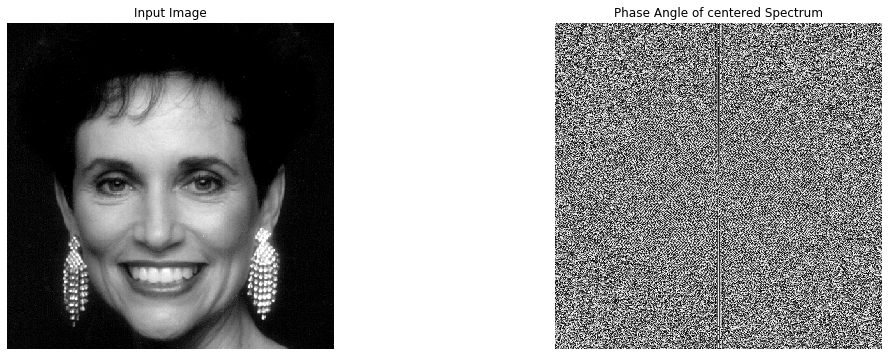

In [8]:
fig = plt.figure(figsize=(18, 6))
plt.subplot(121)
plt.imshow(woman, cmap = 'gray')
plt.title('Input Image')
plt.axis('off')
plt.subplot(122)
plt.imshow(np.angle(CS), "gray")
plt.title("Phase Angle of centered Spectrum")
plt.axis('off')
plt.show()

<span style='font-family:"Times New Roman"'>Non-centered and centered spectrum are clearly different. In centered one there is a vertical line in middle of the image with horizontal artifacts in middle. These artifacts are at corners of the non-centered spectrum and the vertical line is not visible. 
The horizontal shapes in centered spectrum is due to vertical lines in woman’s image (like her earrings) while the vertical artifacts are due to horizontal lines in woman’s image.
From phase angle of the image, nothing is clearly visible except the vertical line in phase angle of centered spectrum. 

In [9]:
Fuv = np.abs(Freqwoman)
fuv = np.fft.ifft2(Fuv)
fuv = np.fft.fftshift(fuv)

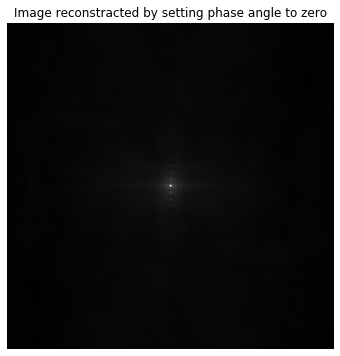

In [23]:
fig = plt.figure(figsize=(18, 6))
plt.imshow(np.real(fuv), "gray")
plt.title("Image reconstracted by setting phase angle to zero")
plt.axis('off')
plt.show()

In [11]:
Fuvmag1 = np.arctan2(np.imag(Freqwoman),np.real(Freqwoman))
Fuvmag1 = np.exp(((-1)**0.5)*(Fuvmag1))
Imag1 = np.real(np.fft.ifft2(Fuvmag1))

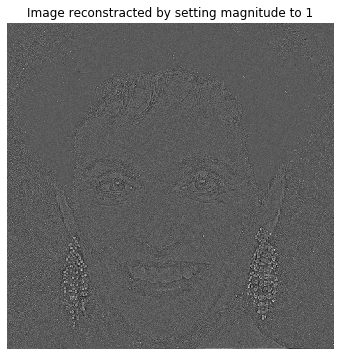

In [12]:
fig = plt.figure(figsize=(18, 6))
plt.imshow(Imag1, "gray")
plt.title("Image reconstracted by setting magnitude to 1")
plt.axis('off')
plt.show()

<span style='font-family:"Times New Roman"'> The phase of the image has more topographical information regarding real image compared to magnitude of the image. The phase-only reconstruction preserves features because of the principle of phase congruency. At the location of edges and lines, most of the sinusoid components have the same phase. In short, phase contains the information about the locations of features. By omitting the phase and having magnitude of image, we are omitting the topographical information while having the total intensity of image unchanged. Rejecting the phase information in Fourier space just leads to a spatial redistribution of the intensity in real space

In [13]:
WOMAN1024 = np.fft.fft2(woman, s = (1024,1024))
magnitude_spectrum_NC_1024 = np.log(np.abs(np.fft.fftshift(WOMAN1024)))
WOMAN256 = np.fft.fft2(woman, s = (256,256))
magnitude_spectrum_NC_256 = np.log(np.abs(np.fft.fftshift(WOMAN256)))

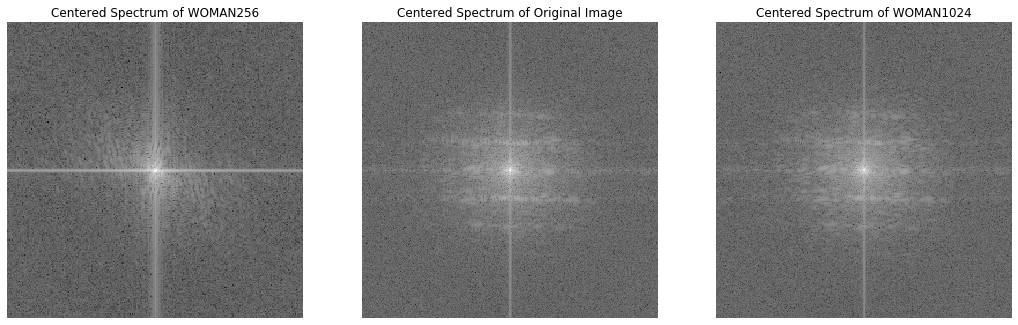

In [14]:
fig = plt.figure(figsize=(18, 6))
plt.subplot(131)
plt.imshow(magnitude_spectrum_NC_256, cmap = 'gray')
plt.title('Centered Spectrum of WOMAN256')
plt.axis('off')
plt.subplot(132)
plt.imshow(magnitude_spectrum_NC, cmap = 'gray')
plt.title('Centered Spectrum of Original Image')
plt.axis('off')
plt.subplot(133)
plt.imshow(magnitude_spectrum_NC_1024, cmap = 'gray')
plt.title('Centered Spectrum of WOMAN1024')
plt.axis('off')
plt.show()

<span style='font-family:"Times New Roman"'> The original centered spectrum looks like centered spectrum of woman1024 and these two are clearly different than spectrum of woman256. The woman256 has two almost perpendicular lines while the original spectrum and 1024 have one vertical line with horizontal artifacts in between. The reason of this behavior is the window size of the Fourier. 

In [15]:
woman256 = np.fft.ifft2(WOMAN256 , s = (256,256))
woman512 = np.fft.ifft2(Freqwoman , s = (512,512))
woman1024 = np.fft.ifft2(WOMAN1024 , s = (1024,1024))

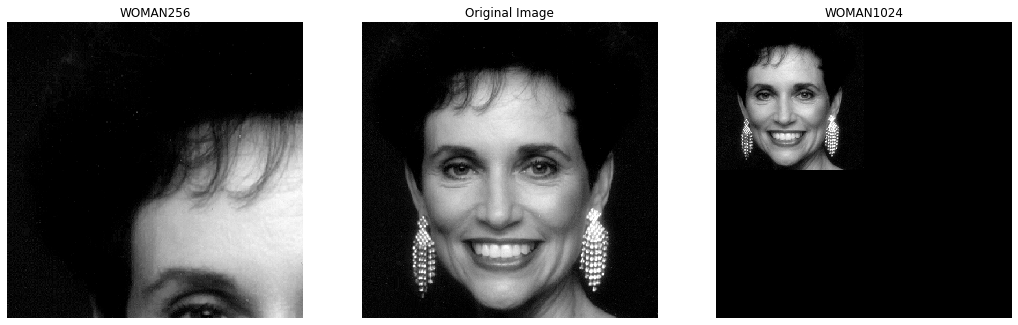

In [16]:
fig = plt.figure(figsize=(18, 6))
plt.subplot(131)
plt.imshow(np.real(woman256), cmap = 'gray')
plt.title('WOMAN256')
plt.axis('off')
plt.subplot(132)
plt.imshow(np.real(woman512), cmap = 'gray')
plt.title('Original Image')
plt.axis('off')
plt.subplot(133)
plt.imshow(np.real(woman1024), cmap = 'gray')
plt.title('WOMAN1024')
plt.axis('off')
plt.show()

<span style='font-family:"Times New Roman"'> The main reason is the windows size of the Fourier. In 256 window size, we are rejecting information while having Fourier transformation and when we have the inverse Fourier., we get the part of the image. For original image, we are having the same size of Fourier. And the inverse Fourier is intact. Finally, for window size of 1024, Fourier transform is adding zeros to image and when having inverse Fourier the generate zero intensity regions attached to original image. 

In [17]:
woman256_512 = np.fft.ifft2(WOMAN256 , s = (512,512))
woman1024_512 = np.fft.ifft2(WOMAN1024 , s = (512,512))

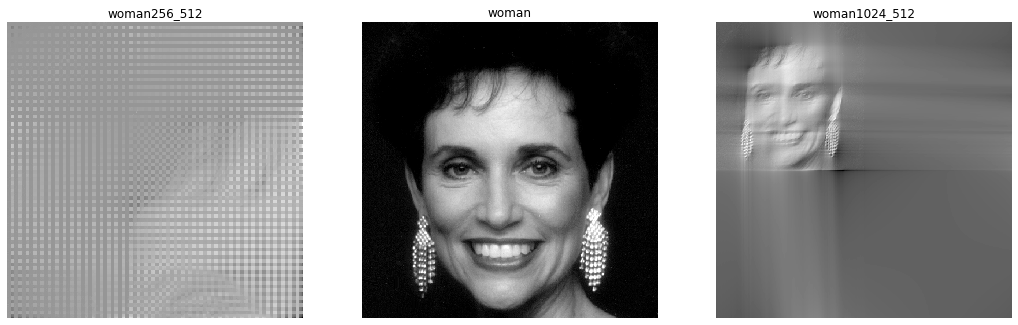

In [18]:
fig = plt.figure(figsize=(18, 6))
plt.subplot(131)
plt.imshow(np.real(woman256_512), cmap = 'gray')
plt.title('woman256_512')
plt.axis('off')
plt.subplot(132)
plt.imshow(woman, cmap = 'gray')
plt.title('woman')
plt.axis('off')
plt.subplot(133)
plt.imshow(np.real(woman1024_512), cmap = 'gray')
plt.title('woman1024_512')
plt.axis('off')
plt.show()

<span style='font-family:"Times New Roman"'> Again, all comes to size of the windows of inverse Fourier transform. When having inverse of woman256 as a 512 by 512 image, the inverse Fourier transform tries to expand its values which are 256 by 256 inside 512 by 512 matrix. Consequently, it will result in an image with distorted intensity values while preserving some of its topographical information. In the same way, inverse Fourier transform of woman1024 inside 512 by 512 image will result in an image with distorted intensity values while preserving the shape of the main image. Here inverse Fourier transform tries to reshape a 1024 by 1024 results inside 512 by 512 file which will result in distortion in intensity values. 

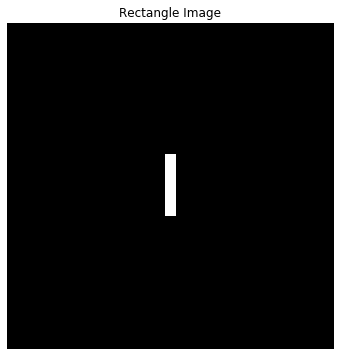

In [19]:
fig = plt.figure(figsize=(18, 6))
rec = mpimg.imread('rectangle.tif')
imgplot = plt.imshow(rec, cmap = 'gray')
plt.title('Rectangle Image')
plt.axis('off')
plt.show()

In [20]:
rec1024 = np.fft.fft2(rec)
magnitude_spectrum_rec1024 = np.log(np.abs(np.fft.fftshift(rec)))

C:\Users\Szamen\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


In [21]:
rec512 = np.fft.ifft2(rec,s=(512,512))
Fuvmag1 = np.exp(1j*np.angle(Freqwoman))
Imag12 = np.real(np.fft.ifft2(np.multiply(Fuvmag1,np.abs(rec512))))

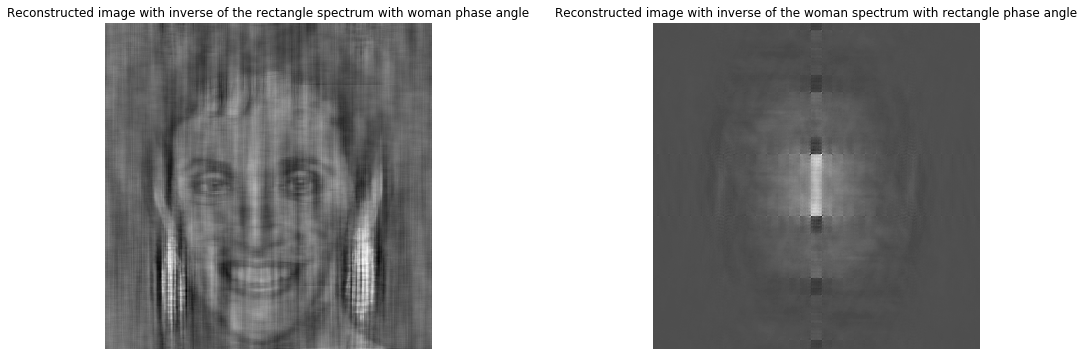

In [22]:
w1024 = np.fft.ifft2(woman, s= (1024,1024))
Fuvmag1 = np.exp(1j*np.angle(rec1024))
Imag1 = np.real(np.fft.ifft2(np.multiply(Fuvmag1,np.abs(w1024))))

fig = plt.figure(figsize=(18, 6))
plt.subplot(121)
plt.imshow(Imag12, cmap = 'gray')
plt.title('Reconstructed image with inverse of the rectangle spectrum with woman phase angle')
plt.axis('off')
plt.subplot(122)
plt.imshow(Imag1, cmap = 'gray')
plt.title('Reconstructed image with inverse of the woman spectrum with rectangle phase angle')
plt.axis('off')
plt.show()